In [1]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature
import scipy.io as spio
import matplotlib
import numpy as np
import pandas as pd
dataset=Path(r'D:\Datasets')

C:\Users\MALIHA\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\MALIHA\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

In [31]:
bathy_file=dataset / 'etopo5.nc'
msl_file= dataset / 'global_omi_sl_regional_trends_19930101_P20200819.nc'
tg_file=dataset / 'TG_PSML.txt'
#ds=bathy.coarsen({'X':12,'Y':12}).mean()

In [33]:
bathy=xr.open_dataset(bathy_file)
trend=xr.open_dataset(msl_file)
tg=pd.read_csv(tg_file,sep=';',comment='#',names=['name','lon','lat'])


In [5]:
file1=Path(r"D:\Datasets\74020\ESACCI-SEALEVEL-IND-MSLTR-MERGED-N_INDIAN_JA_014_01-20200603-fv01.1.nc")
file2=Path(r"D:\Datasets\74020\ESACCI-SEALEVEL-IND-MSLTR-MERGED-N_INDIAN_JA_192_01-20200603-fv01.1.nc")
file3=Path(r"D:\Datasets\74020\ESACCI-SEALEVEL-IND-MSLTR-MERGED-N_INDIAN_JA_231_01-20200603-fv01.1.nc")

In [6]:
ds1=xr.open_dataset(file1)
ds2=xr.open_dataset(file2)
ds3=xr.open_dataset(file3)

In [12]:
file4=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-014-fv01.1.nc")
file5=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-027-fv01.1.nc")
file6=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-053-fv01.1.nc")
file7=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-090-fv01.1.nc")
file8=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-103-fv01.1.nc")
file9=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-129-fv01.1.nc")
file10=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-166-fv01.1.nc")
file11=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-192-fv01.1.nc")
file12=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-205-fv01.1.nc")
file13=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-231-fv01.1.nc")
file14=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-040-fv01.1.nc")
file15=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-116-fv01.1.nc")
file16=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-079-fv01.1.nc")
file17=Path(r"D:\Datasets\XTRACK\ESACCI-SEALEVEL-L3-SLA-N_INDIAN-MERGED-20200113-JA-155-fv01.1.nc")

In [13]:
ds4=xr.open_dataset(file4,decode_times=False)
ds5=xr.open_dataset(file5,decode_times=False)
ds6=xr.open_dataset(file6,decode_times=False)
ds7=xr.open_dataset(file7,decode_times=False)
ds8=xr.open_dataset(file8,decode_times=False)
ds9=xr.open_dataset(file9,decode_times=False)
ds10=xr.open_dataset(file10,decode_times=False)
ds11=xr.open_dataset(file11,decode_times=False)
ds12=xr.open_dataset(file12,decode_times=False)
ds13=xr.open_dataset(file13,decode_times=False)
ds14=xr.open_dataset(file14,decode_times=False)
ds15=xr.open_dataset(file15,decode_times=False)
ds16=xr.open_dataset(file16,decode_times=False)
ds17=xr.open_dataset(file17,decode_times=False)

<IPython.core.display.Javascript object>


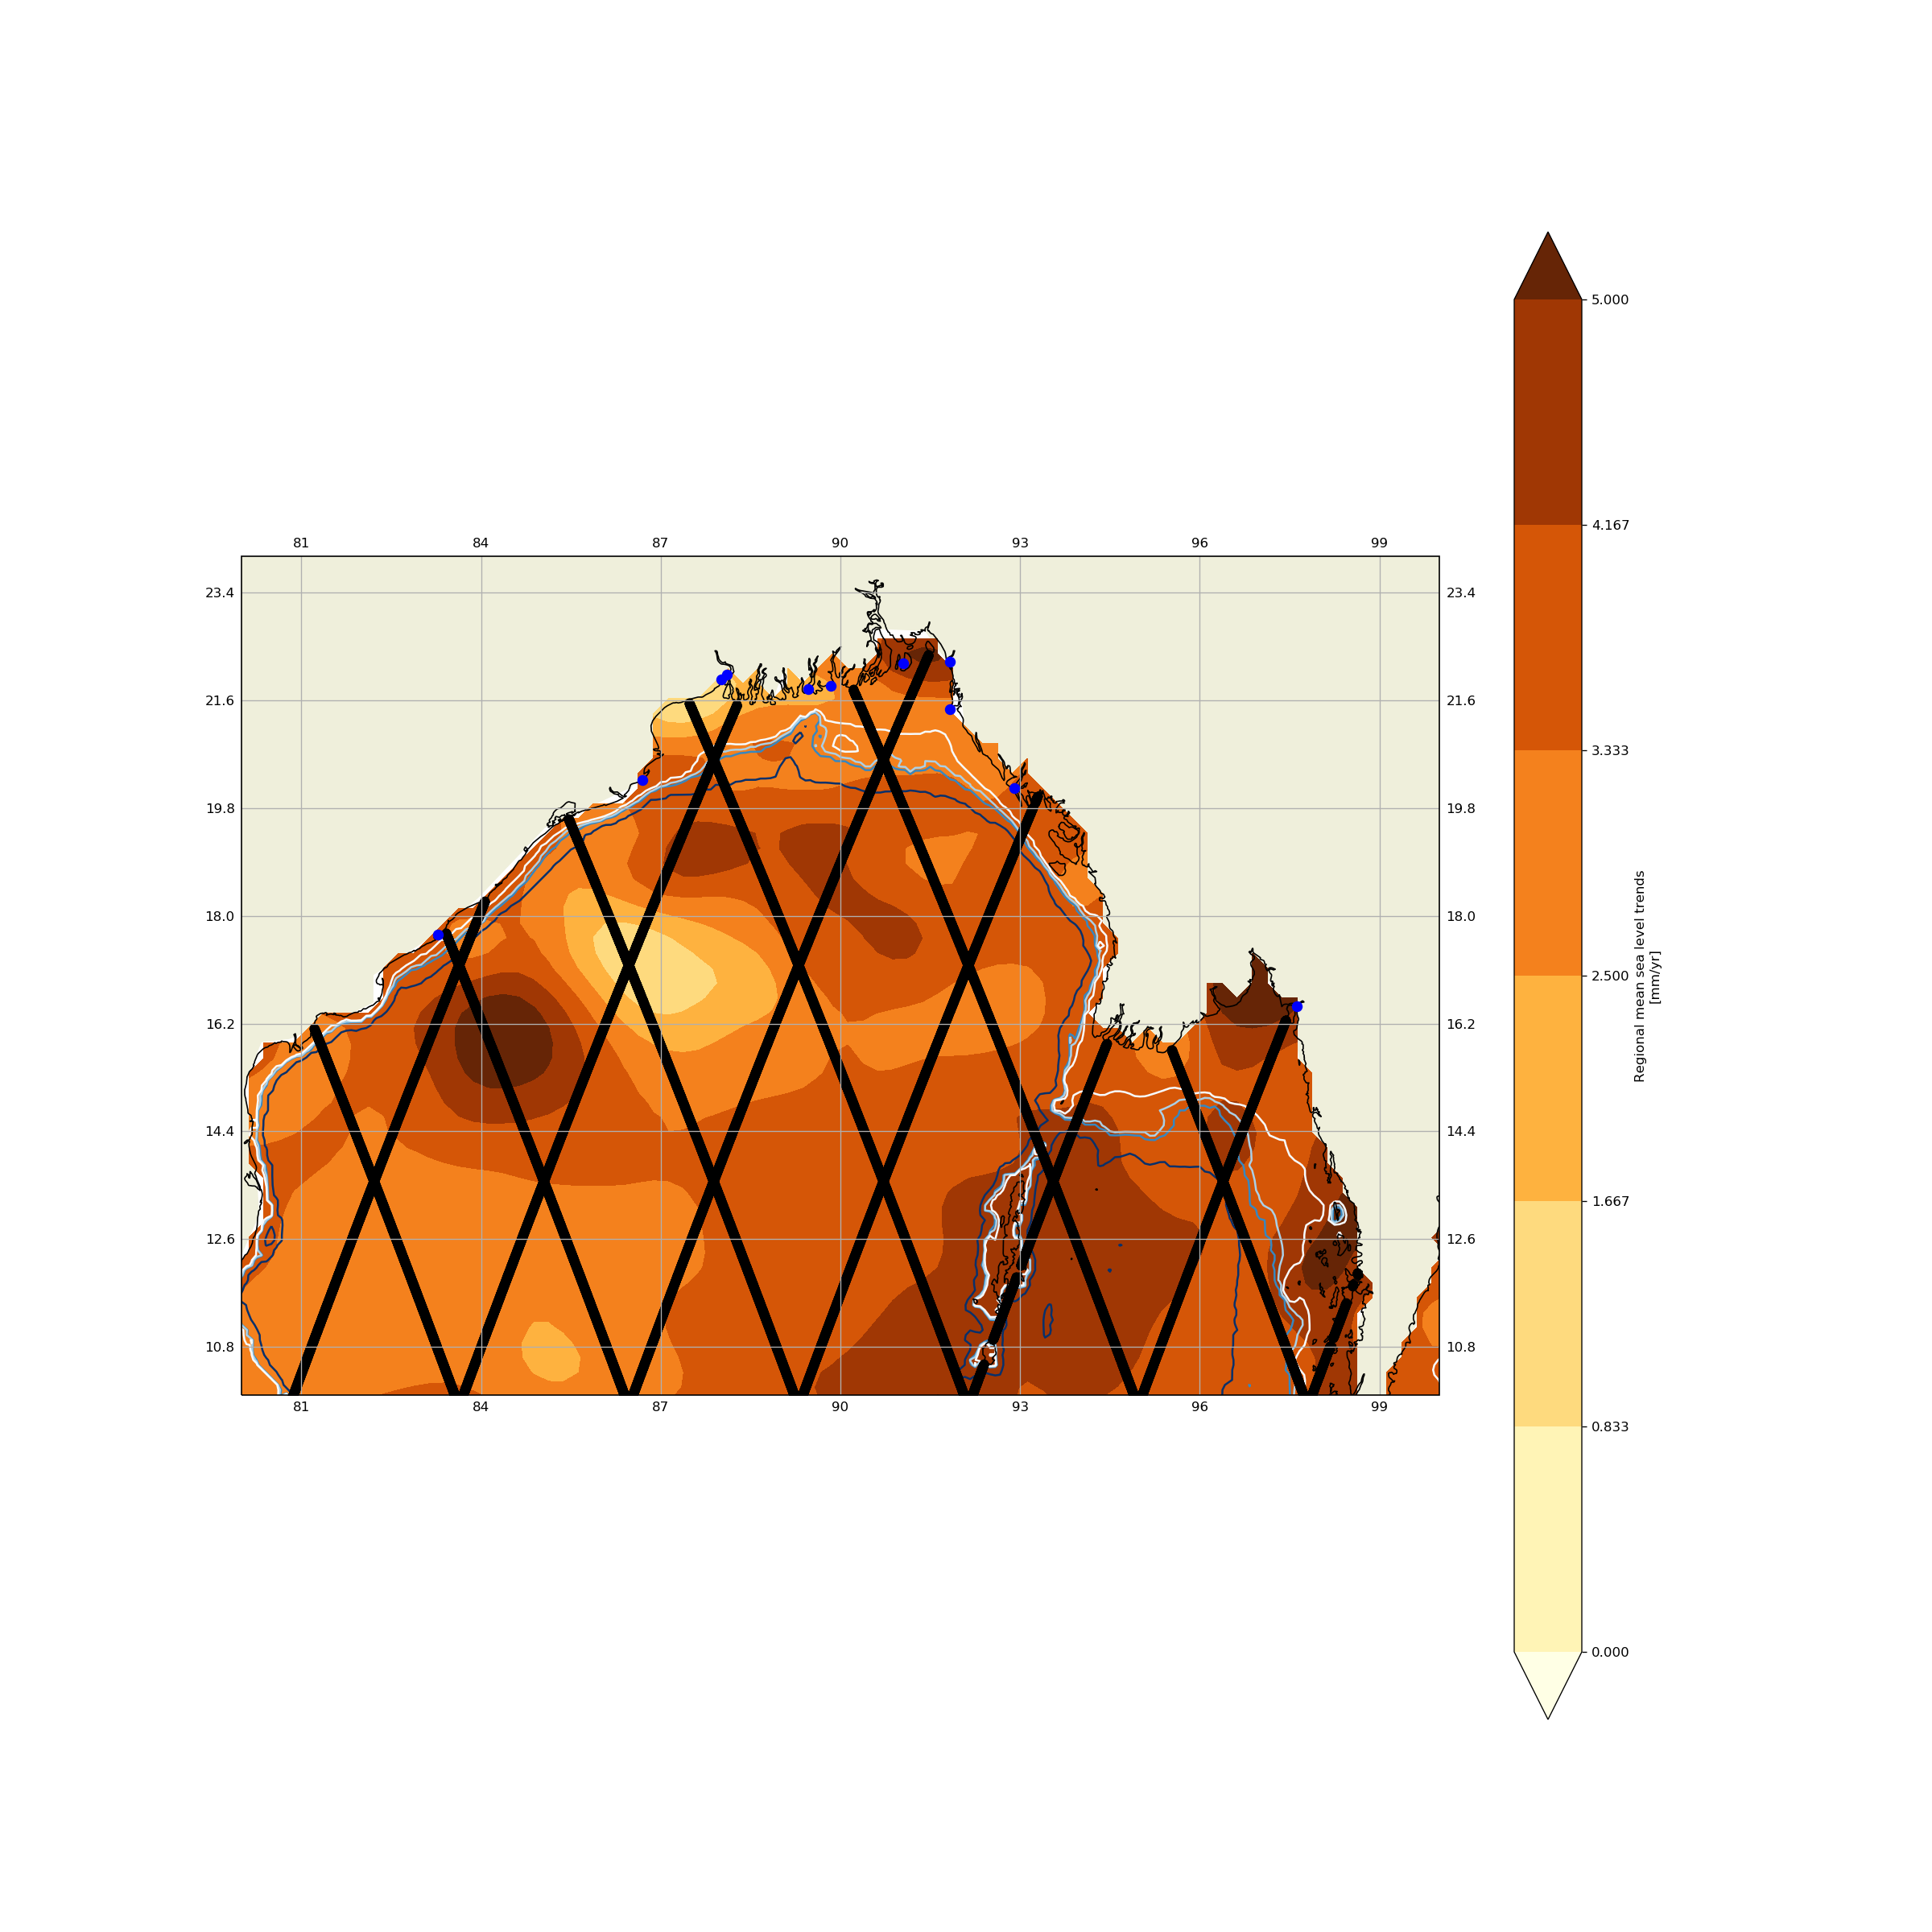

In [49]:
%matplotlib notebook

#definition of color map and levels
cmap_trend = plt.get_cmap('YlOrBr')
cmap = plt.get_cmap('Blues')
reversed_cmap = cmap.reversed()
bathy_levels = [-500,-100,-80,-50]
#trend_levels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]



# basic setup of the map
fig=plt.figure(figsize=(20,20),dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 100, 10, 24], ccrs.PlateCarree())



# map the trend and the bathy contour
cs = trend['msl_trend'].plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cmap=cmap_trend, vmin=0,vmax=5)
cs = bathy['elev'].plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=bathy_levels,cmap=reversed_cmap,zorder=1)
#csb = bathy['elevation'].plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=bathy_levels,color=reversed_cmap)

# section to plot the TG data
ax.scatter(tg.lon,tg.lat,transform=ccrs.PlateCarree(),color='blue',s=50,zorder=4)

#seanoe
#ax.scatter(ds1.lon.values,ds1.lat.values,transform=ccrs.PlateCarree(),color='cyan',zorder=3) 
#ax.scatter(ds2.lon.values,ds2.lat.values,transform=ccrs.PlateCarree(),color='cyan',zorder=3)  
#ax.scatter(ds3.lon.values,ds3.lat.values,transform=ccrs.PlateCarree(),color='cyan',zorder=3)

#XTRACK
ax.scatter(ds4.lon.values,ds4.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2) 
ax.scatter(ds5.lon.values,ds5.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds6.lon.values,ds6.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds7.lon.values,ds7.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds8.lon.values,ds8.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds9.lon.values,ds9.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds10.lon.values,ds10.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds11.lon.values,ds11.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds12.lon.values,ds12.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds13.lon.values,ds13.lat.values,transform=ccrs.PlateCarree(),color='black',zorder=2)
ax.scatter(ds14.lon.values,ds14.lat.values,transform=ccrs.PlateCarree(),color='black',)
ax.scatter(ds15.lon.values,ds15.lat.values,transform=ccrs.PlateCarree(),color='black',)
ax.scatter(ds16.lon.values,ds16.lat.values,transform=ccrs.PlateCarree(),color='black',)
ax.scatter(ds17.lon.values,ds17.lat.values,transform=ccrs.PlateCarree(),color='black',)
# section to plot, coastlines, land, gridlines
ax.coastlines(resolution='10m') 
ax.add_feature(feature.LAND)
ax.gridlines(draw_labels=True)

#plt.title("Bathymetry over Bay of Bengal")
#plt.legend()
plt.show()